In [2]:
print(1)

1


In [2]:
import pylablib as pll
from pylablib.devices import Thorlabs
import matplotlib.pyplot as plt


serial="28897"
dll_path=r'C:\Program Files\Thorlabs\Scientific Imaging\Scientific Camera Support\Scientific Camera Interfaces\SDK\Native Toolkit\dlls\Native_32_lib'
pll.par['devices/dlls/thorlabs_tlcam'] = dll_path
camera = Thorlabs.ThorlabsTLCamera(serial=serial)


In [ ]:
camera.set_exposure(50E-3)
camera.set_roi(0, 128, 0, 128, hbin=2, vbin=2)
   # start the stepping loop
images = []
img = camera.snap()  # grab a single frame

In [3]:
camera.set_exposure(10)

10.000029999999999

In [4]:
camera.get_exposure()

10.000029999999999

In [5]:
camera.set_exposure(0.001)

0.001

In [14]:
import os

os.environ['PATH'] += r";C:\\Program Files\\Thorlabs\\Kinesis"

In [1]:
import os
 
try:
    # if on Windows, use the provided setup script to add the DLLs folder to the PATH
    from windows_setup import configure_path
    configure_path()
except ImportError:
    configure_path = None
 
 
import numpy as np
os.add_dll_directory(r'C:\Program Files\Thorlabs\Scientific Imaging\Scientific Camera Support\Scientific Camera Interfaces\SDK\Native Toolkit\dlls\Native_32_lib')
from PIL import Image
import time
import datetime
from thorlabs_tsi_sdk.tl_camera import TLCameraSDK
def get_timestamp(accuracy):
    ts = time.time()
    if accuracy == 'seconds':
        st = datetime.datetime.fromtimestamp(ts).strftime('%Y-%m-%d %H-%M-%S')
    elif accuracy == 'milliseconds':
        st = datetime.datetime.fromtimestamp(ts).strftime('%Y-%m-%d-%H-%M-%S-%f') 
    return st
 
 
folder = r'D:\Data\2024\202408'
 
with TLCameraSDK() as sdk:
    available_cameras = sdk.discover_available_cameras()
    if len(available_cameras) < 1:
        print("no cameras detected")
 
    with sdk.open_camera(available_cameras[0]) as camera:
    #with sdk.open_camera('17440') as camera:
        camera.exposure_time_us =100  # exposure time is in microseconds
        camera.frames_per_trigger_zero_for_unlimited = 0  # start camera in continuous mode
        camera.image_poll_timeout_ms = 4000  # polling timeout # I don't know what this means??
        #old_roi = camera.roi  # store the current roi
        #print(camera.roi)
        print(camera.exposure_time_us)
        """
        uncomment the line below to set a region of interest (ROI) on the camera
        """
        #camera.roi = (324, 324, 454, 454)  # set roi to be at origin point (100, 100) with a width & height of 500
 
        
        # if camera.gain_range.max > 0:
        #     db_gain = 0
        #     gain_index = camera.convert_decibels_to_gain(db_gain)
        #     camera.gain = gain_index
        # 
        #     #print(f"Set camera gain to {camera.convert_gain_to_decibels(camera.gain)}")
        # 
        # camera.arm(2)
        # 
        # camera.issue_software_trigger()
        # frames_counted = 0
        camera.arm(2)
        camera.issue_software_trigger()
        frame = camera.get_pending_frame_or_null()
        image_data = frame.image_buffer
        img = Image.fromarray(image_data)*(255/1023)
        plt.imshow(img)
        plt.show()
        print(np.amax(image_data))
        
        
    
    
    
    
    
        # img.save(folder + "\\"+ 'TEST' + "_" + str(int(round(camera.exposure_time_us/1000,0))) + "ms.png")
	  #Put loop to do things here...
        # frame = camera.get_pending_frame_or_null()
        # if frame is None:
        # 	raise TimeoutError("Timeout was reached while polling for a frame, program will now exit")
        # frames_counted += 1
        # image_data = frame.image_buffer
        # img = Image.fromarray(image_data)
        # st = get_timestamp('seconds')
        # img.save(folder + "\\"+ st + "_" + str(int(round(camera.exposure_time_us/1000,0))) + "ms.png")
        # print('Image saved') 
        
        time.sleep(0.1)
        camera.disarm()

100


TypeError: unsupported operand type(s) for *: 'Image' and 'float'

In [1]:
camera.get_exposure_time_us()


NameError: name 'camera' is not defined

In [ ]:
with TLCameraSDK().open_camera(TLCameraSDK().discover_available_cameras()[0]) as camera:
    camera.exposure
    camera.

1128


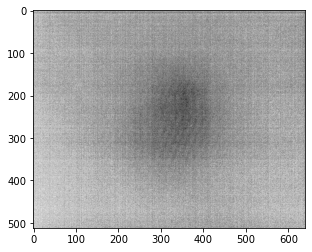

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
1128
[[2.24340176 1.49560117 1.24633431 ... 3.98826979 3.24046921 1.74486804]
 [1.74486804 1.9941349  2.24340176 ... 2.24340176 3.24046921 1.49560117]
 [1.74486804 0.99706745 2.24340176 ... 1.74486804 2.74193548 1.74486804]
 ...
 [2.99120235 3.48973607 3.48973607 ... 1.49560117 2.49266862 3.73900293]
 [3.24046921 3.24046921 2.74193548 ... 3.73900293 4.23753666 3.48973607]
 [1.9941349  3.48973607 1.9941349  ... 3.24046921 3.24046921 2.74193548]]


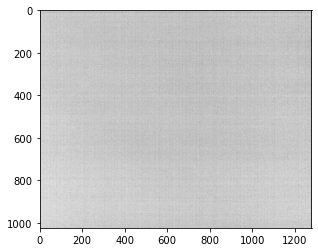

In [7]:
%load_ext autoreload
%autoreload 2

import Components as comp
import matplotlib.pyplot as plt

with comp.Thor_Camera(100,1999994, measure=True, max_frames = 1 ) as camera:
    camera.change_exposure(1128)
    print(camera.get_exposure())
    img = camera.get_image()
    print(img)
    plt.imshow(img,cmap = 'Greys')
    plt.show()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
1
1128
[[1.49560117 1.9941349  1.9941349  ... 3.24046921 3.98826979 2.24340176]
 [1.74486804 0.49853372 1.9941349  ... 1.49560117 2.49266862 1.24633431]
 [0.99706745 0.99706745 1.9941349  ... 1.9941349  2.49266862 3.48973607]
 ...
 [2.99120235 3.73900293 2.24340176 ... 3.24046921 4.73607038 2.49266862]
 [2.74193548 2.49266862 1.74486804 ... 4.23753666 4.73607038 3.48973607]
 [1.9941349  4.73607038 1.9941349  ... 4.23753666 2.24340176 1.74486804]]


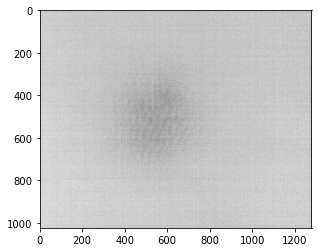

In [3]:

%load_ext autoreload
%autoreload 2

import Components as comp
import matplotlib.pyplot as plt
print("2")
with comp.Thor_Camera(100, 1999994, measure=True, max_frames=1) as camera:
    camera.change_exposure(1128)

    print(camera.get_exposure())
    img = camera.get_image()
    print(img)
    plt.imshow(img, cmap='Greys')
    plt.show()


In [3]:
print(np.amax(img))

